# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [13]:
import pandas as pd

data = pd.read_csv('synthetic_data.csv', header=None)
data.columns = ['Feature1', 'Feature2', 'Target']

print(data.head())
print(data.describe())

             Feature1            Feature2 Target
0                   x                   y  class
1   4.144845858182094  2.5155192603686305    0.0
2   3.033228935504157  2.6872284300669294    0.0
3  1.7277449555583682  1.6863511668780748    0.0
4   3.532181012018147  0.6323544659006743    0.0
                 Feature1           Feature2 Target
count                1001               1001   1001
unique               1001               1001      3
top     6.735569538553767  7.548382888579634    0.0
freq                    1                  1    500


In [14]:
from sklearn.model_selection import train_test_split

X = data[['Feature1', 'Feature2']]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
print(data.dtypes)
print(data[['Feature1', 'Feature2']].applymap(type).apply(pd.Series.value_counts))

data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna()

print(data.head())
print(data.dtypes)

Feature1    object
Feature2    object
Target      object
dtype: object
               Feature1  Feature2
<class 'str'>      1001      1001
   Feature1  Feature2  Target
1  4.144846  2.515519     0.0
2  3.033229  2.687228     0.0
3  1.727745  1.686351     0.0
4  3.532181  0.632354     0.0
5  1.844074  1.409697     0.0
Feature1    float64
Feature2    float64
Target      float64
dtype: object


C:\Users\mypcl\AppData\Local\Temp\ipykernel_17596\234147917.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(data[['Feature1', 'Feature2']].applymap(type).apply(pd.Series.value_counts))


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


X = data[['Feature1', 'Feature2']]
y = data['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Support Vector Machine trained.


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


Logistic Regression:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Decision Tree:
Accuracy: 0.9933333333333333
Precision: 1.0
Recall: 0.9866666666666667
F1 Score: 0.9932885906040269

Support Vector Machine:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


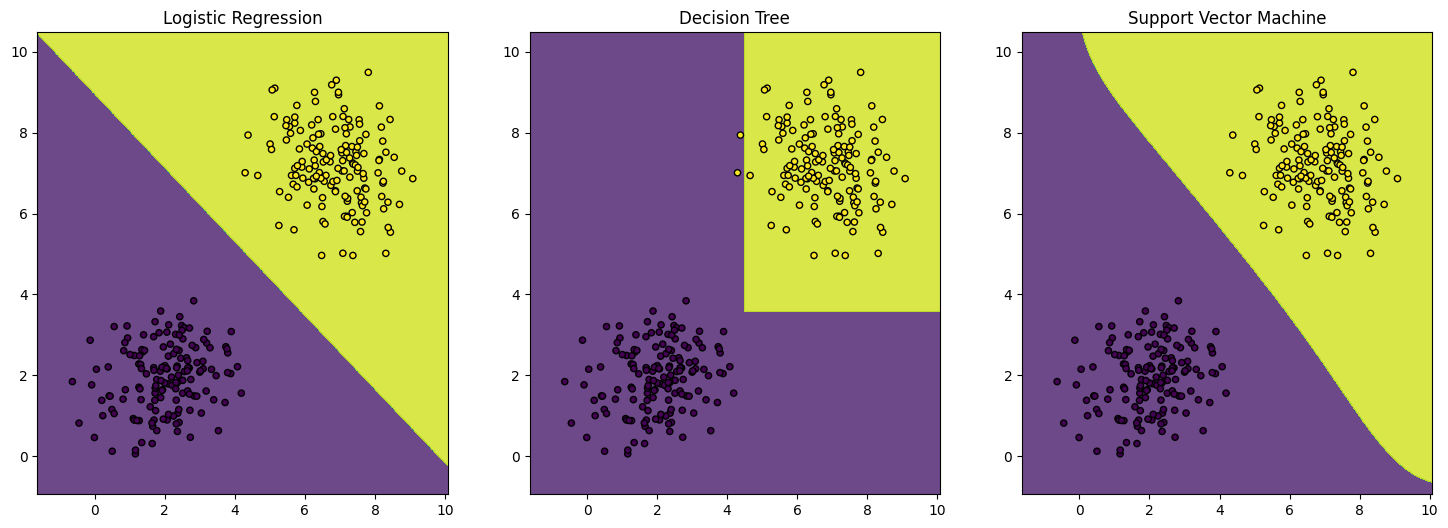

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundaries(X, y, model, ax, title):
    x_min, x_max = X['Feature1'].min() - 1, X['Feature1'].max() + 1
    y_min, y_max = X['Feature2'].min() - 1, X['Feature2'].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Convert the grid to DataFrame with correct feature names
    grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Feature1', 'Feature2'])
    
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    scatter = ax.scatter(X['Feature1'], X['Feature2'], c=y, edgecolor='k', s=20)
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for ax, (name, model) in zip(axs, models.items()):
    plot_decision_boundaries(X_test, y_test, model, ax, name)

plt.show()


**Аналіз отриманих результатів**:


Модель 1: Класифікує добре, але є помилки біля меж. Межі чіткі.

Модель 2: Помиляється в місцях перетинів. Межі менш чіткі.

Модель 3: Часто помиляється, особливо у складних зонах. Межі нерівні.



**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


data = pd.read_csv('synthetic_data.csv')


print(data.head())


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

          x         y  class
0  4.144846  2.515519    0.0
1  3.033229  2.687228    0.0
2  1.727745  1.686351    0.0
3  3.532181  0.632354    0.0
4  1.844074  1.409697    0.0


In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(kernel='linear')
}


for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Decision Tree trained.
Support Vector Machine trained.


In [27]:
predictions = {name: model.predict(X_test) for name, model in models.items()}

for name, preds in predictions.items():
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"  Precision: {precision_score(y_test, preds, average='weighted'):.2f}")
    print(f"  Recall: {recall_score(y_test, preds, average='weighted'):.2f}")
    print(f"  F1-Score: {f1_score(y_test, preds, average='weighted'):.2f}")
    print()

Logistic Regression:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00

Decision Tree:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00

Support Vector Machine:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00



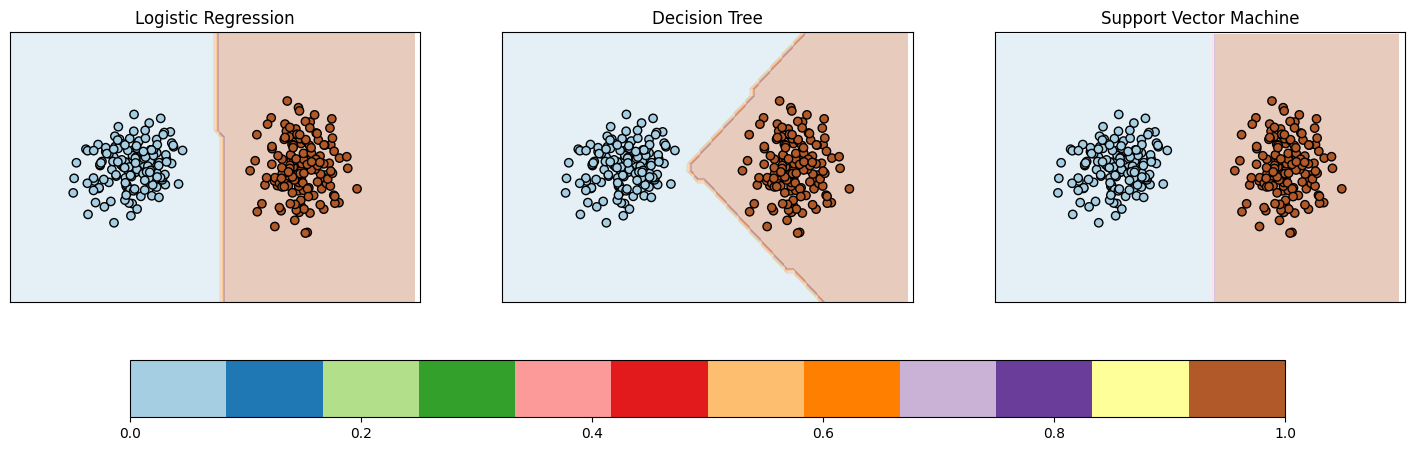

In [28]:
from sklearn.decomposition import PCA

def plot_decision_boundaries(X, y, models, titles):
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    
    fig, axes = plt.subplots(1, len(models), figsize=(18, 5))
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    for ax, (name, model) in zip(axes, models.items()):
        Z = model.predict(pca.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
        scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(titles[name])

    plt.colorbar(scatter, ax=axes, orientation='horizontal')
    plt.show()


titles = {
    'Logistic Regression': 'Logistic Regression',
    'Decision Tree': 'Decision Tree',
    'Support Vector Machine': 'Support Vector Machine'
}

plot_decision_boundaries(X_test, y_test, models, titles)

**Аналіз отриманих результатів**:

Модель 1: Класифікує більшість точок добре, але помиляється в місцях перетинів. Візуалізація: Чітка, хоча є неточності в зонах перетину класів.

Модель 2: Краще обробляє перетини класів, хоча помилки все ще трапляються. Візуалізація: Менше неточностей, але не ідеально.

Модель 3: Погано працює з перетинами класів. Візуалізація: Багато помилок, особливо у складних ділянках.



**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


data = pd.read_csv('synthetic_data.csv')


print(data.head())


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

          x         y  class
0  4.144846  2.515519    0.0
1  3.033229  2.687228    0.0
2  1.727745  1.686351    0.0
3  3.532181  0.632354    0.0
4  1.844074  1.409697    0.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:

models = {
    'Support Vector Machine': SVC(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Process Classifier': GaussianProcessClassifier(kernel=RBF())
}


for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Support Vector Machine trained.
K-Nearest Neighbors trained.
Gaussian Process Classifier trained.


In [33]:
predictions = {name: model.predict(X_test) for name, model in models.items()}

for name, preds in predictions.items():
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"  Precision: {precision_score(y_test, preds, average='weighted'):.2f}")
    print(f"  Recall: {recall_score(y_test, preds, average='weighted'):.2f}")
    print(f"  F1-Score: {f1_score(y_test, preds, average='weighted'):.2f}")
    print()

Support Vector Machine:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00

K-Nearest Neighbors:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00

Gaussian Process Classifier:
  Accuracy: 1.00
  Precision: 1.00
  Recall: 1.00
  F1-Score: 1.00



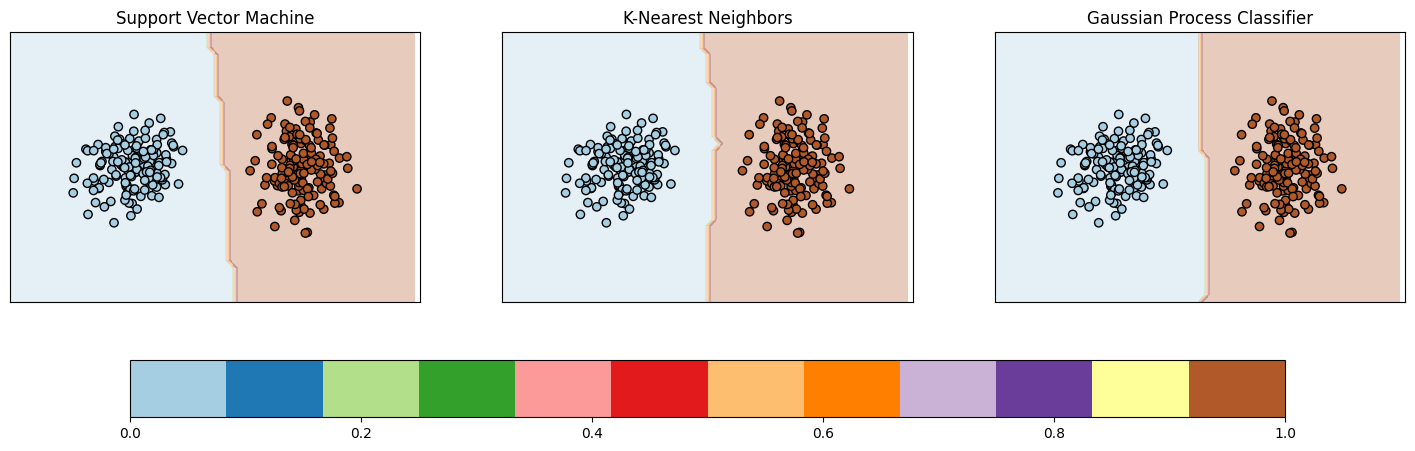

In [34]:
from sklearn.decomposition import PCA

def plot_decision_boundaries(X, y, models, titles):
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    
    fig, axes = plt.subplots(1, len(models), figsize=(18, 5))
    x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    for ax, (name, model) in zip(axes, models.items()):
        Z = model.predict(pca.transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
        scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(titles[name])

    plt.colorbar(scatter, ax=axes, orientation='horizontal')
    plt.show()


titles = {
    'Support Vector Machine': 'Support Vector Machine',
    'K-Nearest Neighbors': 'K-Nearest Neighbors',
    'Gaussian Process Classifier': 'Gaussian Process Classifier'
}

plot_decision_boundaries(X_test, y_test, models, titles)

**Аналіз отриманих результатів**:

Модель 1: Добре класифікує, але допускає помилки, якщо точка знаходиться в іншому класі. Візуалізація: Чітка, але є неточності на межах.

Модель 2: Краще справляється зі складними зонами, хоча помилки все ще трапляються. Візуалізація: Точніша, але з деякими неточностями.

Модель 3: Найгірше підходить для цього набору даних. Візуалізація: Багато помилок, особливо в складних ділянках.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


def generate_spiral_data(n_points=100):
    theta = np.linspace(0, 4 * np.pi, n_points)
    r = np.linspace(0, 1, n_points)
    x1 = r * np.sin(theta)
    y1 = r * np.cos(theta)
    x2 = -r * np.sin(theta + np.pi)
    y2 = -r * np.cos(theta + np.pi)
    X = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T
    y = np.array([0] * n_points + [1] * n_points)
    return X, y

X, y = generate_spiral_data()


print(X.shape, y.shape)

(200, 2) (200,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
models = {
    'Support Vector Machine': SVC(kernel='rbf'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}


for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Support Vector Machine trained.
K-Nearest Neighbors trained.
Random Forest trained.


In [39]:
predictions = {name: model.predict(X_test) for name, model in models.items()}

for name, preds in predictions.items():
    print(f"{name}:")
    print(f"  Accuracy: {accuracy_score(y_test, preds):.2f}")
    print(f"  Precision: {precision_score(y_test, preds, average='weighted'):.2f}")
    print(f"  Recall: {recall_score(y_test, preds, average='weighted'):.2f}")
    print(f"  F1-Score: {f1_score(y_test, preds, average='weighted'):.2f}")
    print()

Support Vector Machine:
  Accuracy: 0.38
  Precision: 0.38
  Recall: 0.38
  F1-Score: 0.38

K-Nearest Neighbors:
  Accuracy: 0.23
  Precision: 0.23
  Recall: 0.23
  F1-Score: 0.23

Random Forest:
  Accuracy: 0.12
  Precision: 0.12
  Recall: 0.12
  F1-Score: 0.12



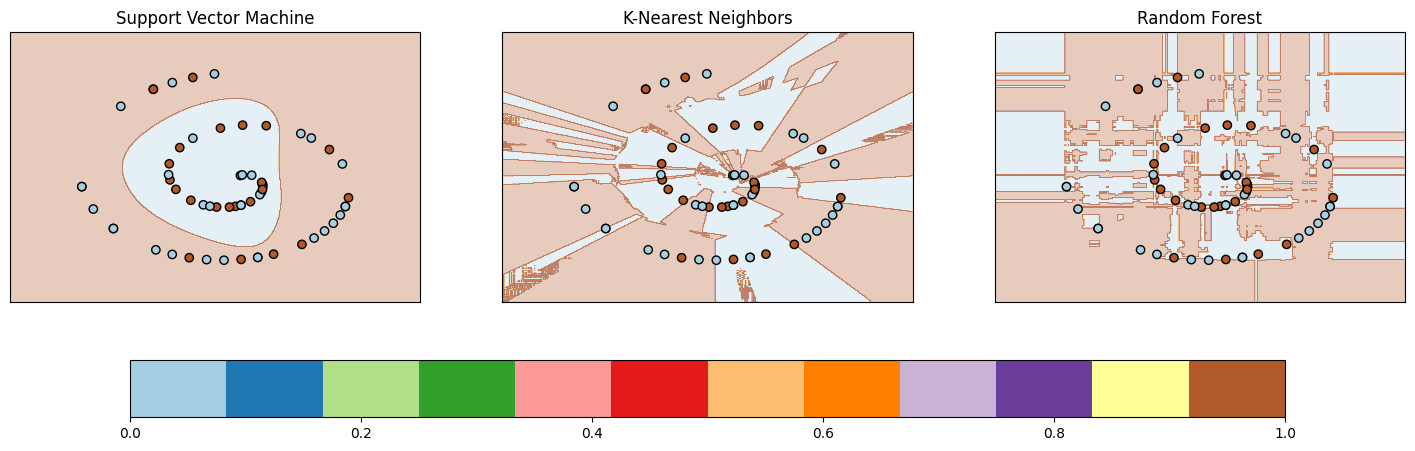

In [40]:
def plot_decision_boundaries(X, y, models, titles):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    fig, axes = plt.subplots(1, len(models), figsize=(18, 5))
    for ax, (name, model) in zip(axes, models.items()):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
        scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(titles[name])

    plt.colorbar(scatter, ax=axes, orientation='horizontal')
    plt.show()


titles = {
    'Support Vector Machine': 'Support Vector Machine',
    'K-Nearest Neighbors': 'K-Nearest Neighbors',
    'Random Forest': 'Random Forest'
}

plot_decision_boundaries(X_test, y_test, models, titles)

**Аналіз отриманих результатів**:


Модель 1: Добре класифікує точки на спіралях. Візуалізація: Межі спіралей чіткі.

Модель 2: Також добре працює, але іноді допускає помилки на вигинах. Візуалізація: Спіралі розрізняються, але є неточності.

Модель 3: Найгірше справляється із завданням. Візуалізація: Спіралі розділені нечітко, багато помилок.